In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings


In [2]:
warnings.filterwarnings('ignore')
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=121)
iris_data = load_iris()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=121)

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file= "tree.dot", class_names= iris_data.target_names,
                feature_names= iris_data.feature_names , impurity = True, filled = True)

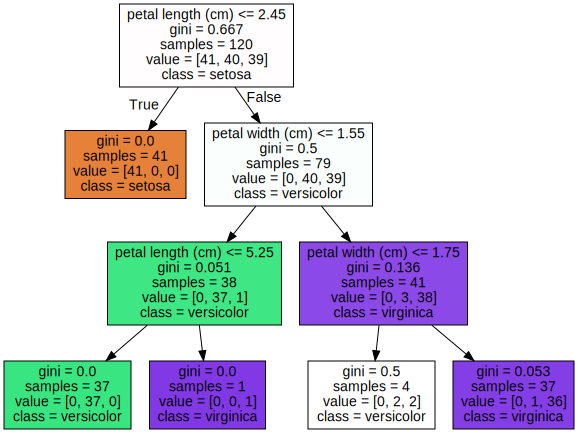

In [5]:
import graphviz
with open("tree.dot") as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances : [0.    0.    0.558 0.442]
sepal length (cm) 0.0
sepal width (cm) 0.0
petal length (cm) 0.5581074301265275
petal width (cm) 0.4418925698734724


<AxesSubplot:>

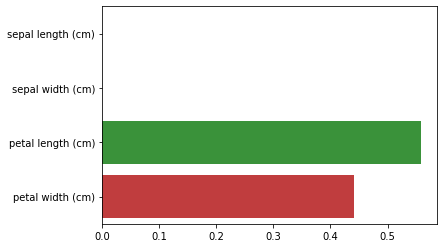

In [11]:
#feature importance : information gain이 큰 쪽으로 feature를 선택해 준다
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print(f"Feature importances : {np.round(dt_clf.feature_importances_,3)}")

#feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print(name , value)

#feature importance를 column별로 시각화 하기
sns.barplot(x = dt_clf.feature_importances_, y = iris_data.feature_names)

### 결정트리 과적합

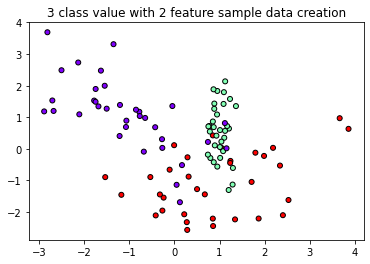

In [13]:
#make_classification : 분류를 위한 테스트용 데이터를 쉽게 만드는 함수 

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
plt.title("3 class value with 2 feature sample data creation")


#2차원 시각화 위해 feature는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

#plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스값은 다른 색으로 표시 됨
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels, s=25, cmap='rainbow',edgecolors='k')

In [ ]:
X_features

#### Classifier의 Decision Boundary를 시각화 하는 함수 : Decision Boundary만들기


In [14]:
import numpy as np
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y) :
    # 서브플롯들의 형태와 개별 플롯
    fig, ax = plt.subplots()
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap="rainbow", edgecolors="k",
               clim=(y.min(), y.max()), zorder=3)
    ax.axis("tight")
    ax.axis("off")
    xlim_start, xlim_end = ax.get_xlim()
    ylim_start, ylim_end = ax.get_ylim()
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X,y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    # meshgrid는 격자모양의 좌표평면
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200),
                         np.linspace(ylim_start, ylim_end, num=200))
    # np.c_는 2차원축을 기준으로 병합 → 평탄화 된 xx와 yy 결합
    # ndarray.ravel는 평탄화
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    # contourf()를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                          levels=np.arange(n_classes + 1) - 0.5,
                          cmap="rainbow", clim=(y.min(), y.max()),
                          zorder=1)

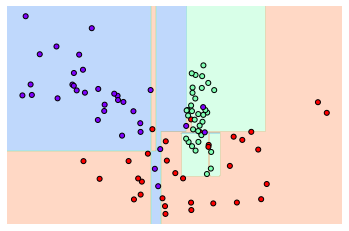

In [15]:
#아무런 제약 없이 Decision Tree 했을 때
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정경계 시각화
dt_clf =  DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

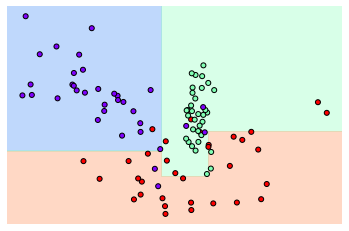

In [21]:
#min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
#min_samples_leaf의 값을 키우면 더 이상 분할하지 않고, 리프 노드가 될 수 있는 조건이 완화

dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features , y_labels)
visualize_boundary(dt_clf , X_features, y_labels)


### 앙상블 학습

In [ ]:
import pandas as pd